<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-geomechanics/blob/master/homework%202/homework2_reservoir_geomechanics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 2**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
!git clone https://www.github.com/yohanesnuwara/reservoir-geomechanics

Cloning into 'reservoir-geomechanics'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 51 (delta 22), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (51/51), done.


## Part 1. Estimate the Depth of Gulf of Mexico Overpressure

### Task. Predict porosity versus depth with porosity-Sv equation

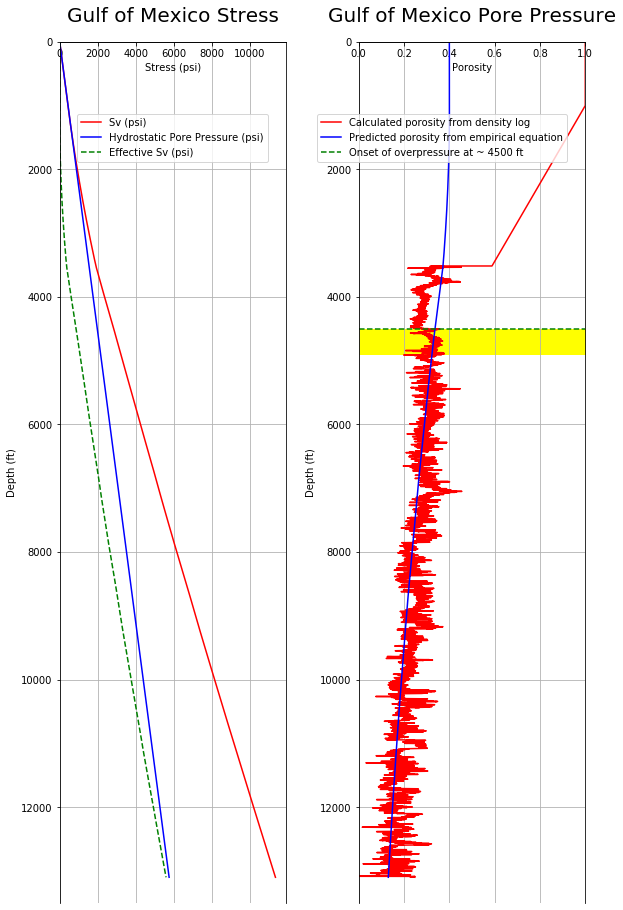

In [0]:
"Task 1: Predict porosity versus depth with porosity-Sv equation"

"load TXT result of homework 1 calculated overburden stress and porosity of Gulf of Mexico"

gom = np.loadtxt('/content/reservoir-geomechanics/homework 1/HW1_result_gom.txt')
depth = gom[:,0]; sv = gom[:,1]; poro = gom[:,2]

# known
pp_hydro_grad = 0.44 # psi/ft
poro_initial = 0.4
beta = 0.0002
depth_to_seabed = 1000 # ft

pp_hydro = depth * pp_hydro_grad

# calculate effective vertical stress
sv_eff = sv - pp_hydro

# predict porosity with empirical equation
poro_empirical = poro_initial * np.exp(-(beta) * sv_eff)

plt.figure(figsize=(9, 13))

plt.subplot(1, 2, 1)
p1 = plt.plot(sv, depth, 'r')
p2 = plt.plot(pp_hydro, depth, 'b')
p3 = plt.plot(sv_eff, depth, '--' ,color='green')
plt.title("Gulf of Mexico Stress", pad=20, size=20)
plt.legend((p1[0], p2[0], p3[0]), ('Sv (psi)', 'Hydrostatic Pore Pressure (psi)', 'Effective Sv (psi)'), bbox_to_anchor=(0.04, 0.82, 0.9, 0.102))
plt.xlabel("Stress (psi)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 13500); plt.xlim(xmin=0)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1, 2, 2)
p4 = plt.plot(poro, depth, 'r')
p5 = plt.plot(poro_empirical, depth, 'b')

"Task 2: Define the onset of overpressured zone"

# define the onset of pore pressure
depth_onset = [4500, 4500]
x_onset = [0, 1]
p6 = plt.plot(x_onset, depth_onset, '--', color='green')

# define the transition overpressure zone
fill = np.full((len(depth)), 1)
plt.fill_between([0, 1], 4500, 4900, color='yellow')

plt.title("Gulf of Mexico Pore Pressure", pad=20, size=20)
plt.legend((p4[0], p5[0], p6[0]), ('Calculated porosity from density log', 'Predicted porosity from empirical equation', 'Onset of overpressure at ~ 4500 ft'), bbox_to_anchor=(0.04, 0.82, 0.9, 0.102))
plt.xlabel("Porosity"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 13500); plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout(pad=2) # set distance between two plots

## Part 2. Calculate Pore Pressure 

### Task 1. Calculate Pore Pressure from the Equation Used in Part 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


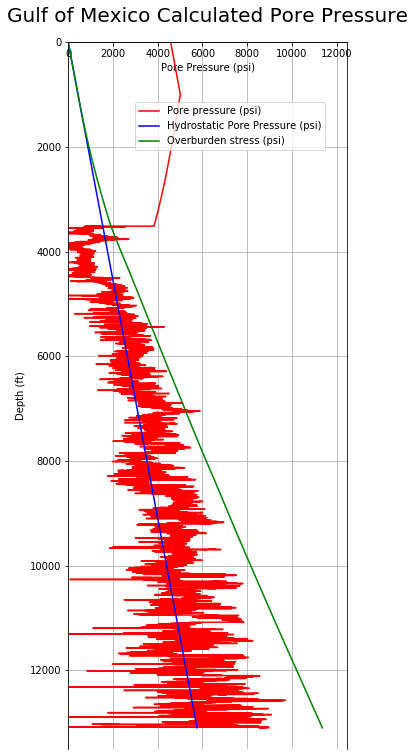

In [50]:
# original equation: poro = poro_initial * np.exp(-(beta) * sv_eff)
# equation of Pp from density porosity: Pp = sv - ((ln(poro_initial) - ln(poro)) / beta)

a = np.log(poro_initial) - np.log(poro)
pore_pressure = sv - (a / beta)

plt.figure(figsize=(5, 13))

p1 = plt.plot(pore_pressure, depth, 'r')
p2 = plt.plot(pp_hydro, depth, 'b')
p3 = plt.plot(sv, depth, color='green')
plt.title("Gulf of Mexico Calculated Pore Pressure", pad=20, size=20)
plt.legend((p1[0], p2[0], p3[0]), ('Pore pressure (psi)', 'Hydrostatic Pore Pressure (psi)', 'Overburden stress (psi)'), bbox_to_anchor=(0.04, 0.82, 0.9, 0.102))
plt.xlabel("Pore Pressure (psi)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 13500); plt.xlim(xmin=0)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

### Task 2. Calculate the Magnitude of Overpressure

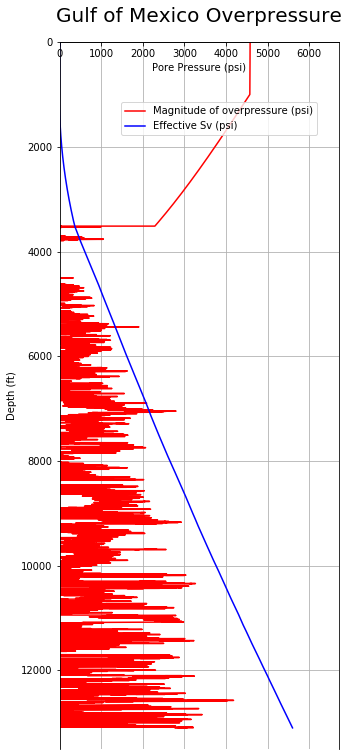

In [49]:
"Subtract the calculated pore pressure with the hydrostatic pore pressure"

ovpp = pore_pressure - pp_hydro

plt.figure(figsize=(5, 13))

p1 = plt.plot(ovpp, depth, 'r')
p2 = plt.plot(sv_eff, depth, 'b')
plt.title("Gulf of Mexico Overpressure", pad=20, size=20)
plt.legend((p1[0], p2[0]), ('Magnitude of overpressure (psi)', 'Effective Sv (psi)'), bbox_to_anchor=(0.04, 0.82, 0.9, 0.102))
plt.xlabel("Pore Pressure (psi)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 13500); plt.xlim(xmin=0)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')